In [31]:
# This is a sample Python script.

import sys
sys.path.insert(1, './functions/')

import numpy as np
import matplotlib.pyplot as plt
from aoa_est import *
from source_separation import *

import wave
from scipy.io import wavfile
import librosa
import soundfile as sf
from glob import glob
import os


def load_audio_file(channel_path):
    audio, _ = librosa.load(channel_path, sr=16000)
    return audio



space = 0.2 # Spacing Between Antenna Array Microphones
sr = 16000 # Sampling Rate of Audio File
c = 340 # Speed of sound in air


## Part 1 and Part 2 of Assignment - Single Source for both noise and Noisy Audio

M = 4 # Number of microphones in array
N = 1 # Number of sound sources

data_dir = './dataset/Single_Source_Data/'

aoa_est_noise = []
curr_set_dir = os.path.join(data_dir, str(M) + '-' + str(N) + '-v'+str(3))
mix_dir_noise = os.path.join(curr_set_dir, 'mix','noise')

mixtures_noise = []

for i in range(M):
    channel_path_noise = os.path.join(mix_dir_noise, 'channel' + str(i + 1) + '.wav')
    mixture_noise = load_audio_file(channel_path_noise)
    mixtures_noise.append(mixture_noise)
mixtures_noise = np.array(mixtures_noise)

mixtures_noise_fft = fft(mixtures_noise)

(array([ 58, 164, 171]),)


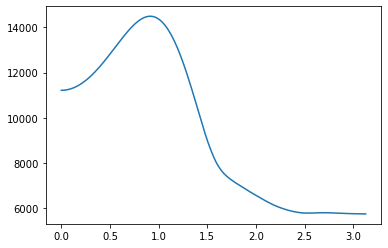

In [35]:
import numpy as np
from scipy.fft import fft, ifft
import scipy.signal as sg
import matplotlib.pyplot as plt

theta = np.arange(0, np.pi, np.pi/200)
ofunction = np.zeros(200)
fi = np.arange(0, 8500, 100)
c = 340
d = 0.2

for i in range(200):
    sum_1 = 0
    for fi_i in fi:
        sum_2 = 0
        for k in range(M):
            e = np.exp(1j * 2 * np.pi * fi_i/10 * d * np.cos(theta[i]) * k / c)
            sum_2 += (e * mixtures_noise_fft[k, fi_i])
        sum_1 += abs(sum_2)
    ofunction[i] = sum_1

max = sg.argrelmax(ofunction)
print(max)

est_aoa = np.zeros((1, N))
if N==1:
    index = np.argmax(ofunction)
    est_aoa = theta[index]
else:
    est_aoa = theta[sg.argrelmax(ofunction)[0]]

plt.figure
plt.plot(theta, ofunction)
plt.show
plt.savefig('output.png')
